## Cats vs Dogs Classification - 21BAI1007


### Importing data From Kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.0MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [6]:
# Data Loaded from kaggle is in zip format. Need to unzip it
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Loading the data - 21BAI1007

In [7]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [8]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
## Normalizing dataset values to a value between 0 and 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
validation = validation.map(process)

### Creating the model - 21BAI1007

In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 64)                33032256  
                                                                 
 dropout (Dropout)           (None, 64)                0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
625/625 [==============================] - 61s 87ms/step - loss: 2.0291 - accuracy: 0.5768 - val_loss: 0.6219 - val_accuracy: 0.6528
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.6045 - accuracy: 0.6684 - val_loss: 1.9469 - val_accuracy: 0.6560
Epoch 3/10
625/625 [==============================] - 50s 79ms/step - loss: 0.5573 - accuracy: 0.7140 - val_loss: 0.6198 - val_accuracy: 0.6810
Epoch 4/10
625/625 [==============================] - 49s 77ms/step - loss: 0.4890 - accuracy: 0.7571 - val_loss: 0.6273 - val_accuracy: 0.7094
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4649 - accuracy: 0.7805 - val_loss: 0.6565 - val_accuracy: 0.7154
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3742 - accuracy: 0.8181 - val_loss: 0.7367 - val_accuracy: 0.6990
Epoch 7/10
625/625 [==============================] - 49s 79ms/step - loss: 0.3358 - accuracy: 0.8396 - val_loss: 0.8359 - val_accuracy:

In [14]:
loss, acc = model.evaluate(validation)

157/157 [==============================] - 9s 55ms/step - loss: 0.9895 - accuracy: 0.6952


### Predicting a random image - 21BAI1007

In [53]:
import cv2
import matplotlib.pyplot as plt
test_image = cv2.imread('/content/cat.jpg')

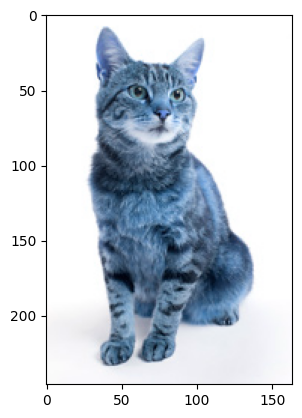

In [54]:
plt.imshow(test_image)

In [55]:
test_image = cv2.resize(test_image,(256,256))

In [56]:
test_input = test_image.reshape((1,256,256,3))

In [57]:
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)

Array[0] -> Cat <br>
Hence, the model has correctly predicted the given image of a cat

In [49]:
test_image2 = cv2.imread('/content/download.jpeg')

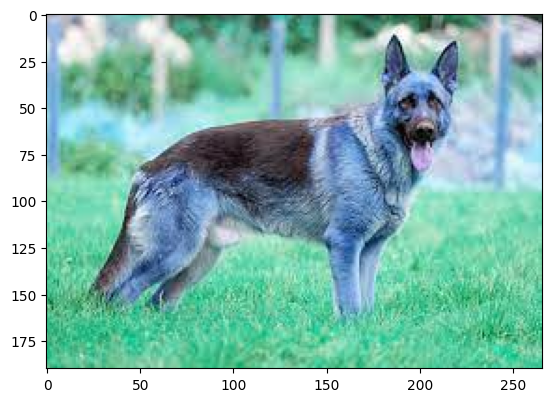

In [50]:
plt.imshow(test_image2)

In [51]:
test_image2 = cv2.resize(test_image2, (256, 256))
test_input2 = test_image2.reshape((1, 256, 256, 3))

In [52]:
model.predict(test_input2)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)

Array[1] -> Dog <br>
Hence the model has successfully predicted both the images of a cat and a dog